# Prepare the Data

Use Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.

* whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.
* algo_returns.csv: Contains returns from the in-house trading algorithms from your company.
* sp500_history.csv: Contains historical closing prices of the S&P 500 Index.

In [1]:
## Import necessary libaries

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
## Find and store files in a variable

aapl_path = Path('appl_historical.csv')
algo_path = Path('algo_returns.csv')
cost_path = Path('cost_historical.csv')
goog_path = Path('goog_historical.csv')
sp500_path = Path('sp500_history.csv')
whale_path = Path('whale_returns.csv')


In [3]:
## Read csv files and store in variable

whale_df = pd.read_csv(whale_path, index_col = 'Date', parse_dates = True)
sp500_df = pd.read_csv(sp500_path, index_col = 'Date', parse_dates = True)
algo_df = pd.read_csv(algo_path, index_col = 'Date', parse_dates = True)


whale_df = whale_df.sort_index()
sp500_df = sp500_df.sort_index()
algo_df = algo_df.sort_index()

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
## Identify and remove all nulls

whale_df = whale_df.dropna().copy()
sp500_df = sp500_df.dropna().copy()
algo_df = algo_df.dropna().copy()

whale_df.isnull().sum()
sp500_df.isnull().sum()
algo_df.isnull().sum()




Algo 1    0
Algo 2    0
dtype: int64

In [5]:
## Remove extra symbols from all the data
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].str.replace(',', '')


## Retrieve the data types for all the data
sp500_df.dtypes

## Converts all of the data in the Close columns into floats
sp500_df['Close'] = sp500_df['Close'].astype('float')

# Check the data types for the changed ata
sp500_df.dtypes


C:\Users\maria\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [6]:
## Converts all necessary data into daily returns
whale_returns = whale_df
algo_returns = algo_df
sp500_returns = sp500_df.pct_change()
sp500_returns.columns = ['S&P TSX']
sp500_returns.head()

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [7]:
#Join the whale, algo, and sp500 returns into one dataframe

combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Perform Analysis

1. Calculate and plot daily returns of all portfolios.
2. Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P 500?

<AxesSubplot:title={'center':'Daily Returns of WHALE, ALGO, & S&P TSX Portfolio'}, xlabel='Date'>

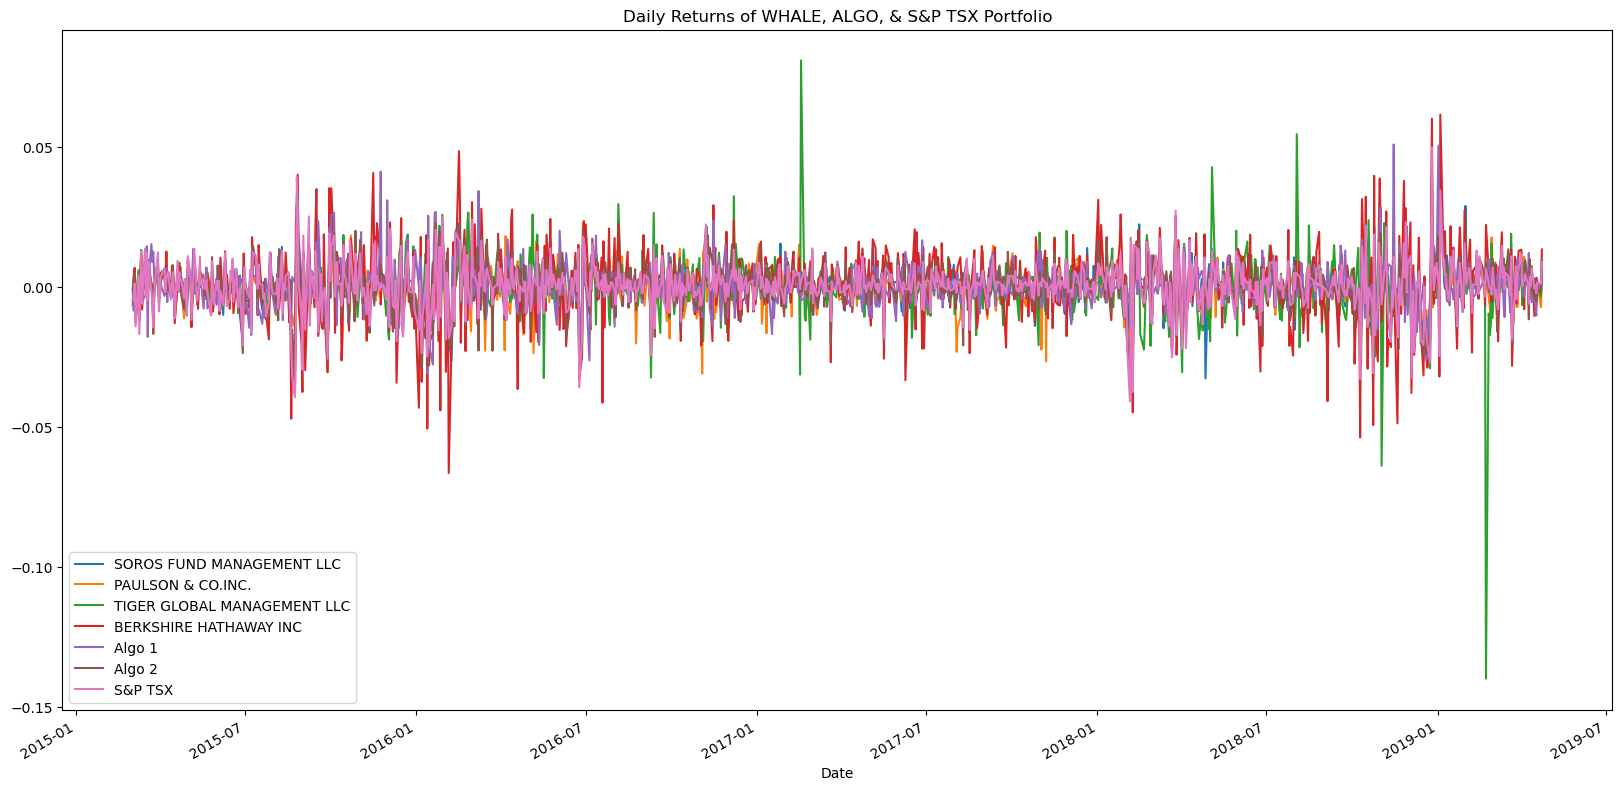

In [77]:
 ## Calculate and plot dailry returns of all portfolios
combined_df.plot(figsize=(20,10), title = 'Daily Returns of WHALE, ALGO, & S&P TSX Portfolio')

<AxesSubplot:title={'center':'Cumulative Returns of WHALE, ALGO & S&P TSX Portfolios'}, xlabel='Date'>

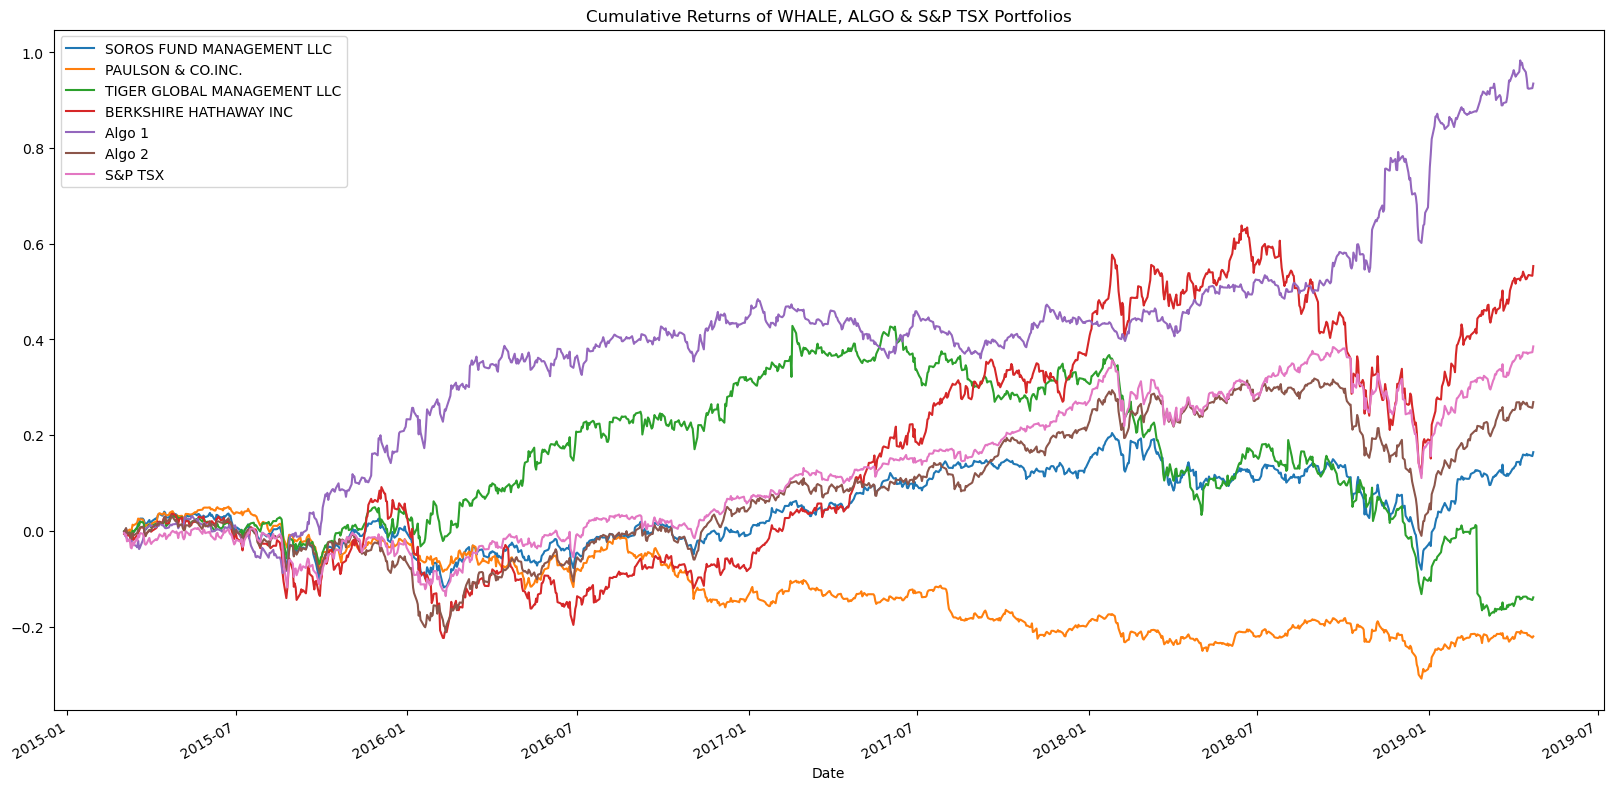

In [78]:
## Calculate and plot cumulative returns for all portfolios

cumulative_df = (1 + combined_df).cumprod() - 1
cumulative_df.plot(figsize=(20,10), title='Cumulative Returns of WHALE, ALGO & S&P TSX Portfolios')

## Does any portfolio outperform the S&P 500?

In [91]:
print('Yes, the Algorithimic 1 and Berkshire Hathaway Inc. portfolios outperforms the S&P500.')


Yes, the Algorithimic 1 and Berkshire Hathaway Inc. portfolios outperforms the S&P500.


# Risk Analysis

1. Create a box plot for each of the returns.
2. Calculate the standard deviation for each portfolio.
3. Determine which portfolios are riskier than the S&P 500.
4. Calculate the annualized standard deviation.

<AxesSubplot:>

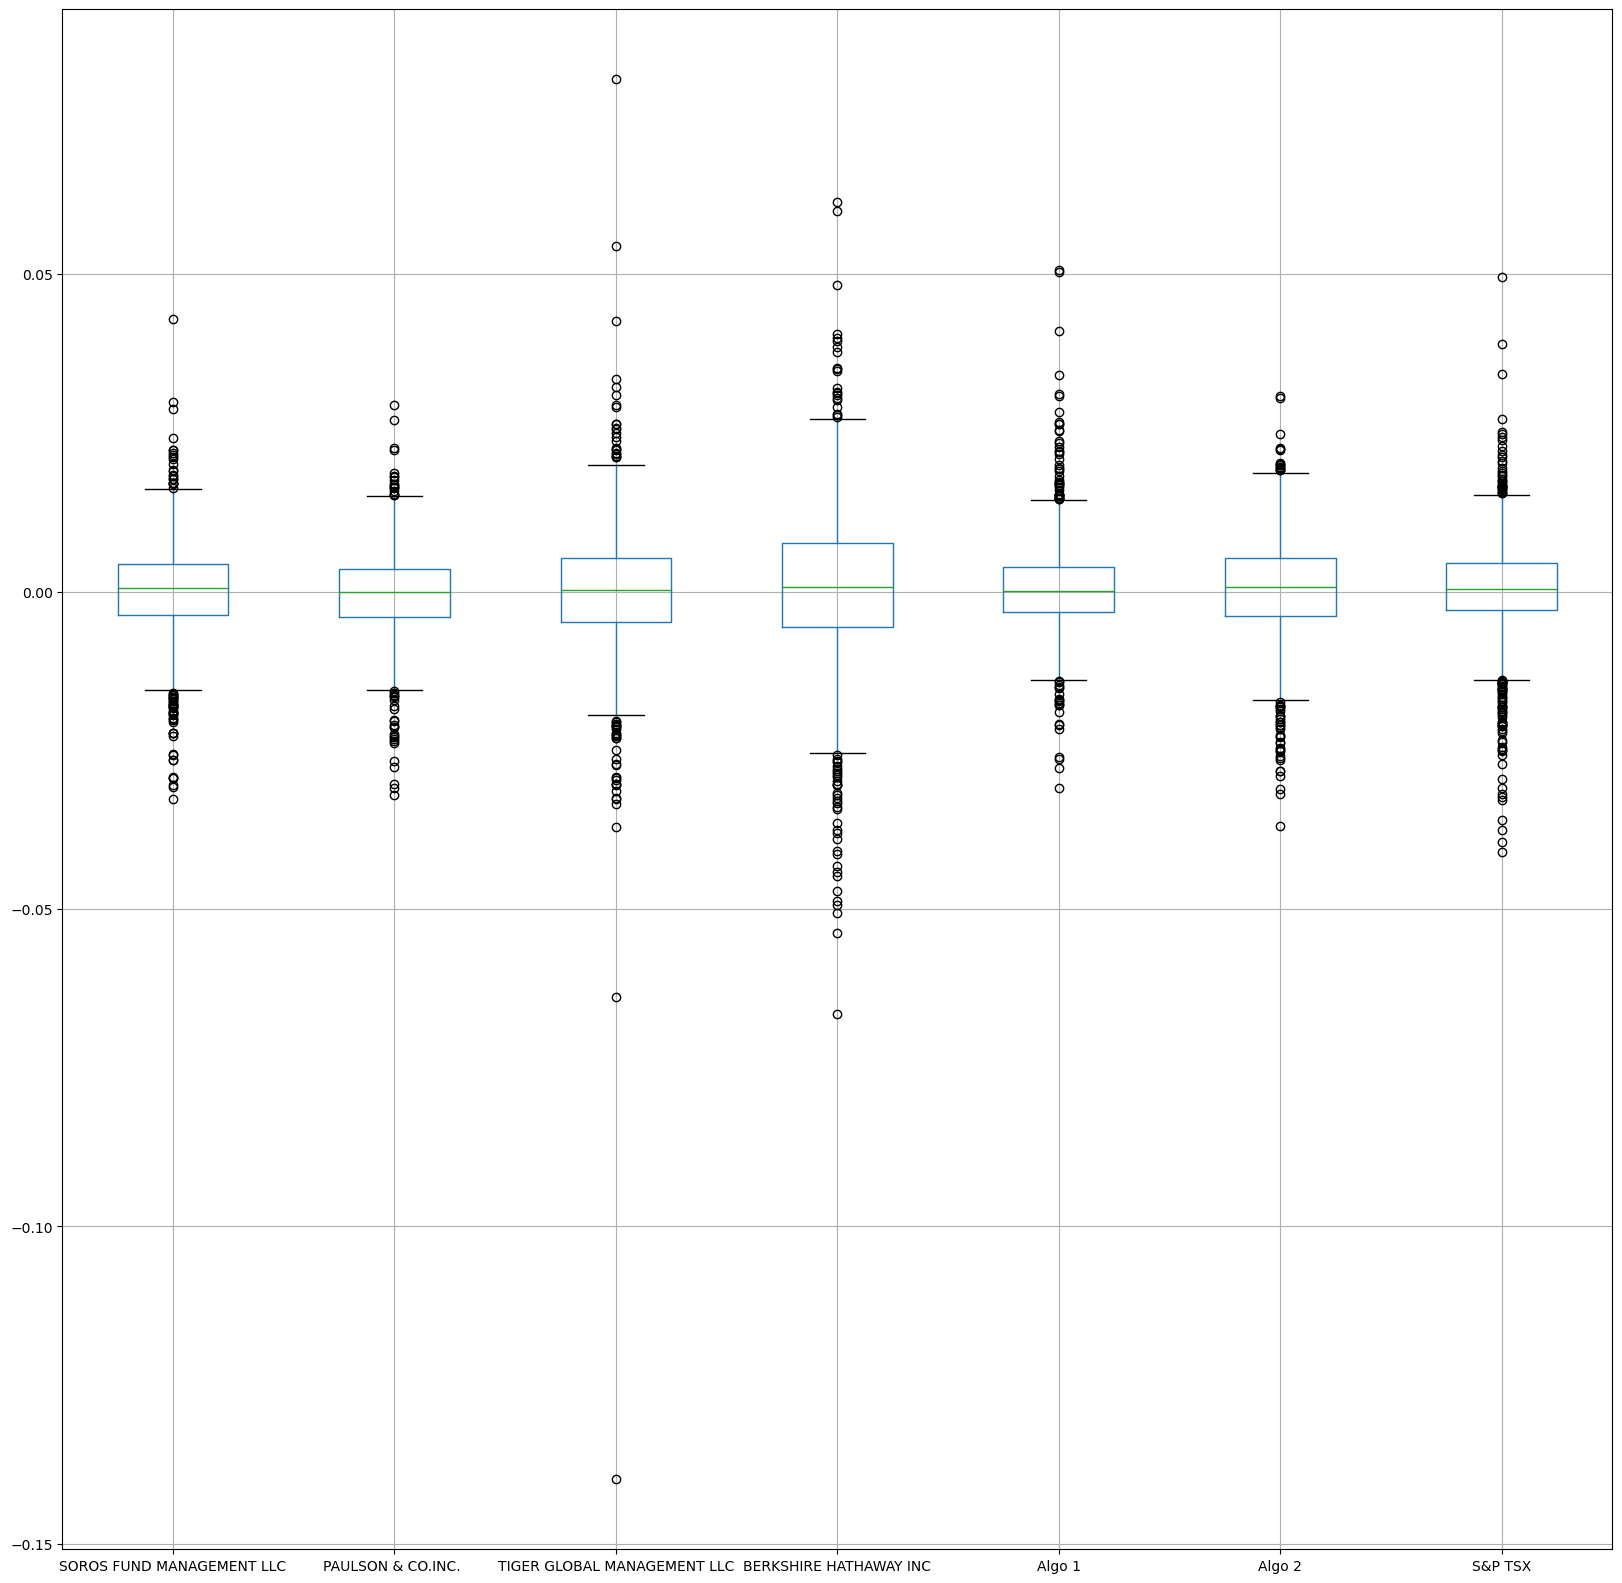

In [80]:
## Create a boxplot for Combined Daily Returns
combined_df.boxplot(figsize=(20,20))

In [72]:
## Create standard deviation for Combined Daily Returns
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P TSX                        0.008554
dtype: float64

In [73]:
## Createa a variable to hold the annualized Standard Deviation
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P TSX                        0.135786
dtype: float64

# Rolling Statistics

1. Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window.
2. Calculate and plot the correlation between each stock to determine which portfolios mimic the S&P 500.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P 500.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation of Whales, Algo, & S&P TSX Portfolios'}, xlabel='Date'>

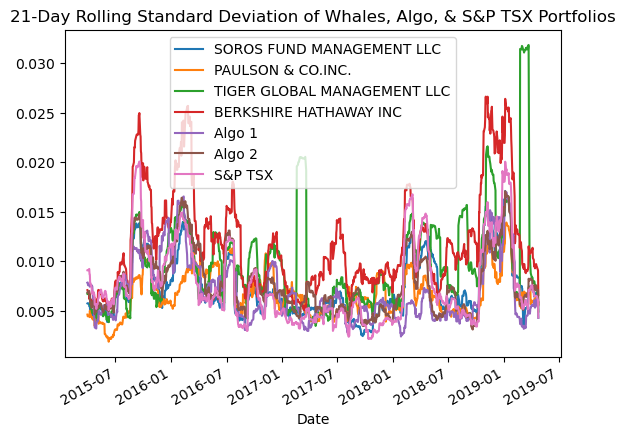

In [81]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window 
combined_21 = combined_df.rolling(window=21).std()
combined_21.plot(title='21-Day Rolling Standard Deviation of Whales, Algo, & S&P TSX Portfolios')

In [16]:
## Calculate and plot the correlation between each stock to determine which portfolios mimic the S&P500
correlation = combined_df.corr()
correlation.style.background_gradient(cmap='bwr')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P TSX,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Beta: Algo 1 Portfolio vs S&P TSX'}, xlabel='Date'>

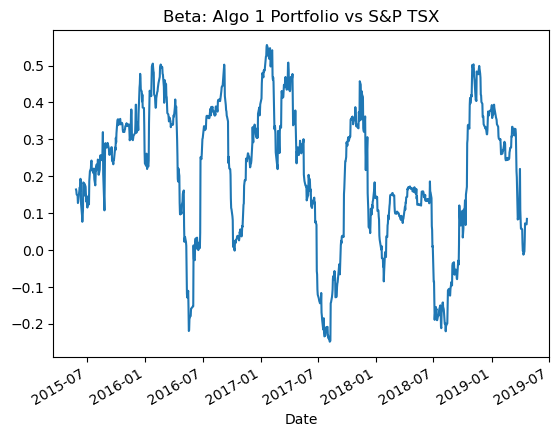

In [92]:
## Calculate the covariance between 2 portfolios

rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P TSX'])
variance = combined_df['S&P TSX'].rolling(60).var()
algo1_beta = rolling_covariance/variance

algo1_beta.plot(title='Beta: Algo 1 Portfolio vs S&P TSX')

# Sharpe Ratios

Investment managers and their institutional investors look at the return-to-risk ratio, not just the returns. After all, if you have two portfolios that each offer a 10% return, yet one is lower risk, you would invest in the lower-risk portfolio, right? Follow these steps:

1. Using the daily returns, calculate the Sharpe ratios and visualize them in a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

<AxesSubplot:title={'center':'Sharpe Ratio of Whale, Algo, & S&P TSX Portfolios'}>

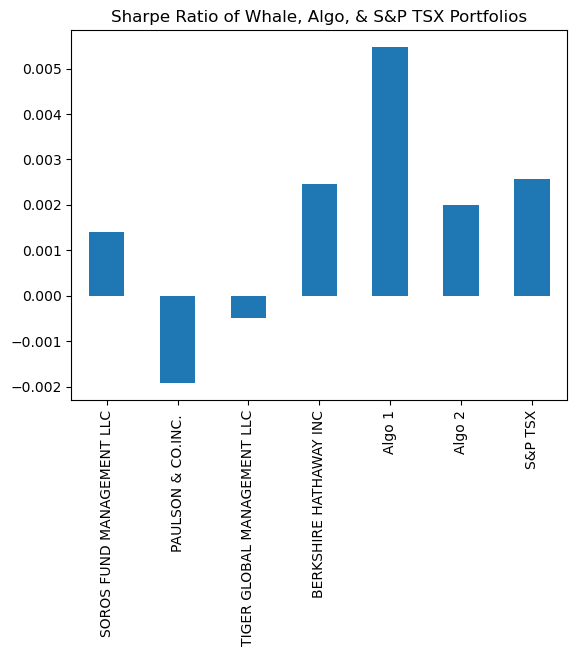

In [84]:
#Calcualte and plot the Sharpe Ratio
Sharpe_Ratio = (combined_df.mean())/(combined_df.std() * np.sqrt(252))
Sharpe_Ratio.plot(kind='bar', title='Sharpe Ratio of Whale, Algo, & S&P TSX Portfolios')

# Performance Evaluation

In [95]:
print(f'The Algorithmic 1 portfolio has the highest sharpe ratio which means a better risk adjustment performance. The beta for Algorithmic 1 fluctuates but is consistently lower than 1 which means the returns are not more volatile than the S&P500 as the baseline. On the other hand, S&P500 is approxiamtely 86% postively correlated to Algorithmic 2 portfolio. In examining the cumulative returns, it is clear that Algorithmic 1 portfolio outperforms S&P500 and the whales portfolios but since Algorithmic 2 has one of the lowest correlations to Algorithmic 1. As Algorthimic 1 portfolio is likely to increase Algorithmic 2 has a lesser chacne of also spiking which means it is unlikely to outperform the S&P500 but it does experience higher cumulative returns than Soros Fund Management LLC and Tiger Global Management LLC as part of the whales portfolios. Therfore, the Algorithmic 1 portfolio does in fact outperform all of the portfolios and the S&P500.')

The Algorithmic 1 portfolio has the highest sharpe ratio which means a better risk adjustment performance. The beta for Algorithmic 1 fluctuates but is consistently lower than 1 which means the returns are not more volatile than the S&P500 as the baseline. On the other hand, S&P500 is approxiamtely 86% postively correlated to Algorithmic 2 portfolio. In examining the cumulative returns, it is clear that Algorithmic 1 portfolio outperforms S&P500 and the whales portfolios but since Algorithmic 2 has one of the lowest correlations to Algorithmic 1. As Algorthimic 1 portfolio is likely to increase Algorithmic 2 has a lesser chacne of also spiking which means it is unlikely to outperform the S&P500 but it does experience higher cumulative returns than Soros Fund Management LLC and Tiger Global Management LLC as part of the whales portfolios. Therfore, the Algorithmic 1 portfolio does in fact outperform all of the portfolios and the S&P500.


# Create Custom Portfolio

Use Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.

* nvda_data: contains closing prices for NVIDIA.
* ntdoy_data: contains closing prices for Nintendo.
* atvi_data: contains closing prices for Activision Blizzard.

In [49]:
## Import necessary libaries

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [50]:
## Find and store files in a variable

nvda_path = Path('nvda_data.csv')
ntdoy_path = Path('ntdoy_data.csv')
atvi_path = Path('atvi_data.csv')
meta_path = Path('meta_data.csv')

In [51]:
## Read csv files and store in variable

nvda_df = pd.read_csv(nvda_path, index_col='Date',infer_datetime_format=True, parse_dates=True)
ntdoy_df = pd.read_csv(ntdoy_path, index_col='Date',infer_datetime_format=True, parse_dates=True)
atvi_df = pd.read_csv(atvi_path, index_col='Date',infer_datetime_format=True, parse_dates=True)
meta_df = pd.read_csv(meta_path, index_col='Date',infer_datetime_format=True, parse_dates=True)

nvda_df = nvda_df.sort_index()
ntdoy_df = ntdoy_df.sort_index()
atvi_df = atvi_df.sort_index()
meta_df = meta_df.sort_index()

atvi_df.head()

,Close
Date,
2014-05-28 16:00:00,20.33
2014-05-29 16:00:00,20.75
2014-05-30 16:00:00,20.78
2014-06-02 16:00:00,20.62
2014-06-03 16:00:00,20.75


In [52]:
## Identify and remove all nulls

nvda_df = nvda_df.dropna().copy()
ntdoy_df = ntdoy_df.dropna().copy()
atvi_df = atvi_df.dropna().copy()
meta_df = meta_df.dropna().copy()

nvda_df.isnull().sum()
ntdoy_df.isnull().sum()
atvi_df.isnull().sum()
meta_df.isnull().sum()

Close    0
dtype: int64

# Calculate Portfolio Returns

1. Calculaute the portfolio returns
2. Calculate the weighted returns for your portfolio, assuming equal # of shares per stock.

In [53]:
# Calculate the returns for NVDA, NTDOY, & ATVI. 

nvda_returns = nvda_df.pct_change()
ntdoy_returns = ntdoy_df.pct_change()
atvi_returns = atvi_df.pct_change()
meta_returns = meta_df.pct_change()
    
nvda_returns.columns = ['NVDA']
ntdoy_returns.columns = ['NTDOY']
atvi_returns.columns = ['ATVI']
meta_returns.columns = ['META']
    
meta_returns.head()

,META
Date,
2014-05-28 16:00:00,NaN
2014-05-29 16:00:00,0.005039
2014-05-30 16:00:00,-0.008303
2014-06-02 16:00:00,-0.003476
2014-06-03 16:00:00,-0.003329


In [54]:
# Join the 3 portfolios into a dataframe

portfolio_returns = pd.concat([nvda_returns, ntdoy_returns, atvi_returns, meta_returns], axis='columns', join='inner')
portfolio_returns.head()

,NVDA,NTDOY,ATVI,META
Date,,,,
2014-05-28 16:00:00,NaN,NaN,NaN,NaN
2014-05-29 16:00:00,-0.002105,0.021053,0.020659,0.005039
2014-05-30 16:00:00,0.002110,0.000000,0.001446,-0.008303
2014-06-02 16:00:00,-0.002105,-0.003436,-0.007700,-0.003476
2014-06-03 16:00:00,-0.004219,0.003448,0.006305,-0.003329


In [55]:


# Calculate the weighted returns for portfolio with equal number of stocks

weights = [.25, .25, .25, .25]

combined_returns = portfolio_returns.dot(weights)
combined_returns.head()

Date
2014-05-28 16:00:00         NaN
2014-05-29 16:00:00    0.011161
2014-05-30 16:00:00   -0.001187
2014-06-02 16:00:00   -0.004179
2014-06-03 16:00:00    0.000551
dtype: float64

In [57]:
#Convert combined_returns into a dataframe
combined_returns = pd.DataFrame(combined_returns)
combined_returns.index = pd.to_datetime(combined_returns.index).date
combined_returns.columns = ['CUS']
combined_returns.head()

,CUS
2014-05-28,NaN
2014-05-29,0.011161
2014-05-30,-0.001187
2014-06-02,-0.004179
2014-06-03,0.000551


In [97]:
#Join the combined_returns with the algorithmic returns
analyses_returns = pd.concat([algo_returns, combined_returns], axis='columns', join='inner')
analyses_returns.head()


,Algo 1,Algo 2,CUS
2014-06-05,0.004062,0.013285,-0.003199
2014-06-06,0.001857,0.008284,-0.000008
2014-06-09,-0.005012,0.005668,0.009426
2014-06-10,0.004406,-0.000735,0.013226
2014-06-11,0.004760,-0.003761,-0.004266


# Risk Analysis

In [63]:
#Calculate the anualized standard deviation for each portfolio
annualized_std = analyses_returns.std() * np.sqrt(252)
annualized_std

Algo 1    0.126801
Algo 2    0.134401
CUS       0.250482
dtype: float64

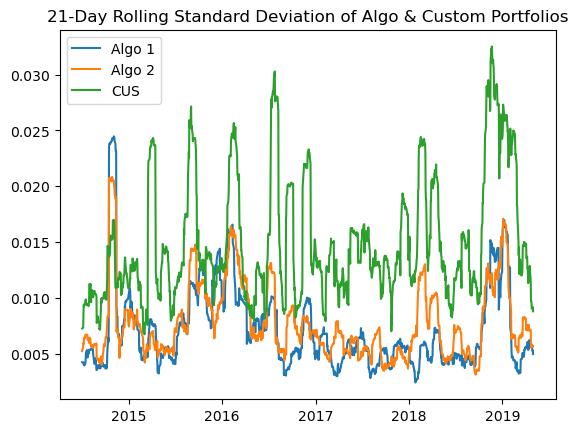

In [86]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window 
analyses_21 = analyses_returns.rolling(window=21).std().plot(title='21-Day Rolling Standard Deviation of Algo & Custom Portfolios')

In [67]:
#Calcualte and plot the correlation
analyses_correlation = analyses_returns.corr()
analyses_correlation.style.background_gradient(cmap='bwr')

,Algo 1,Algo 2,CUS
Algo 1,1.000000,0.346568,0.204890
Algo 2,0.346568,1.000000,0.553405
CUS,0.204890,0.553405,1.000000


<AxesSubplot:title={'center':'Beta: Customer Portfolio vs S&P TSX Portfolio'}>

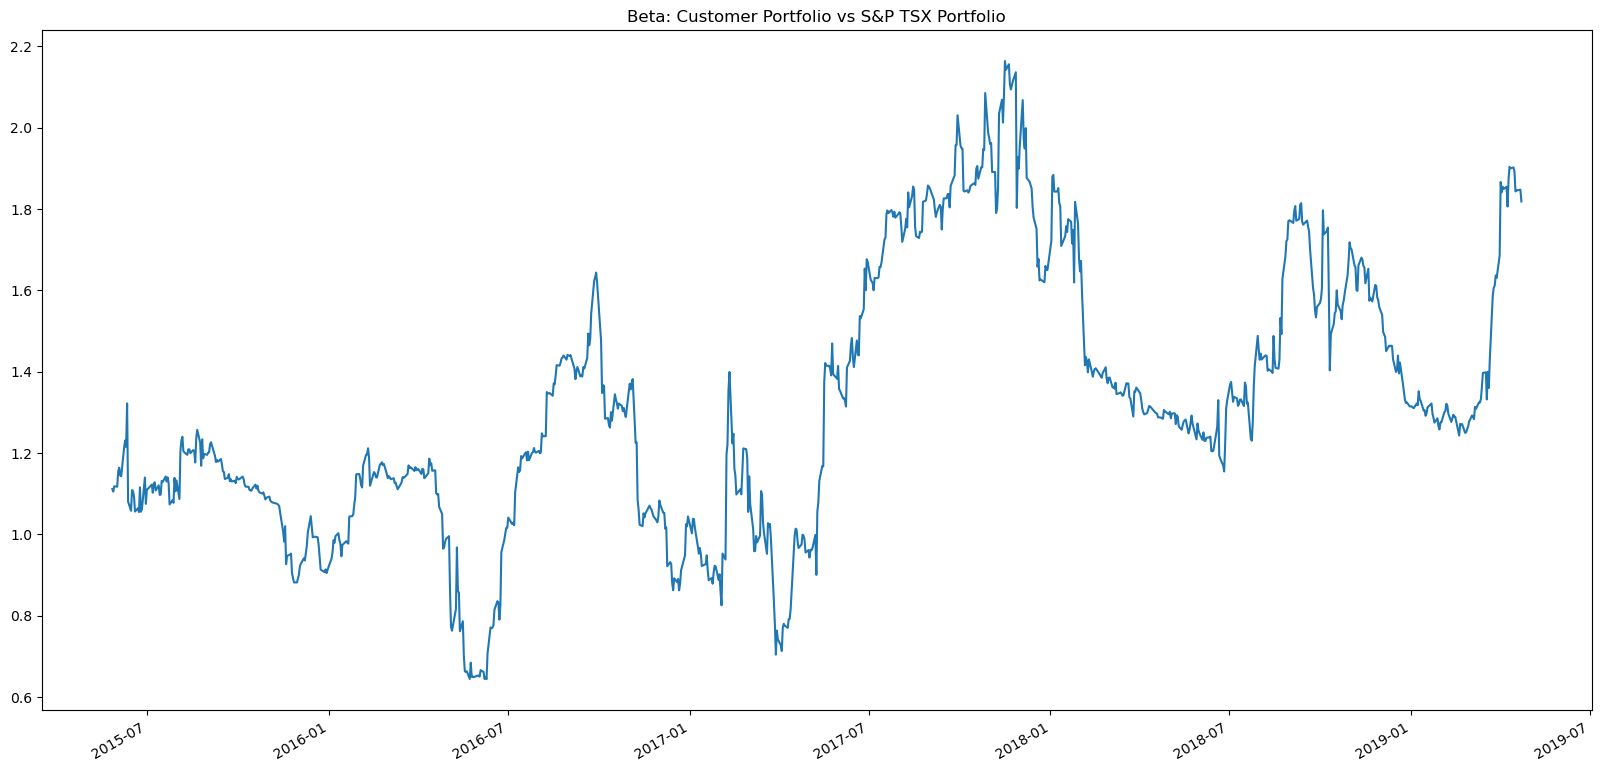

In [87]:
#Calculate and plot beta for your portfollio comared to the S&P 60 TSX

rolling_covariance = analyses_returns['CUS'].rolling(window=60).cov(combined_df['S&P TSX'])
variance = combined_df['S&P TSX'].rolling(60).var()
analyses_beta = rolling_covariance/variance

analyses_beta.plot(figsize=(20,10), title='Beta: Customer Portfolio vs S&P TSX Portfolio')

<AxesSubplot:title={'center':'Sharpe Ratio of Custom & Algo Portfolios'}>

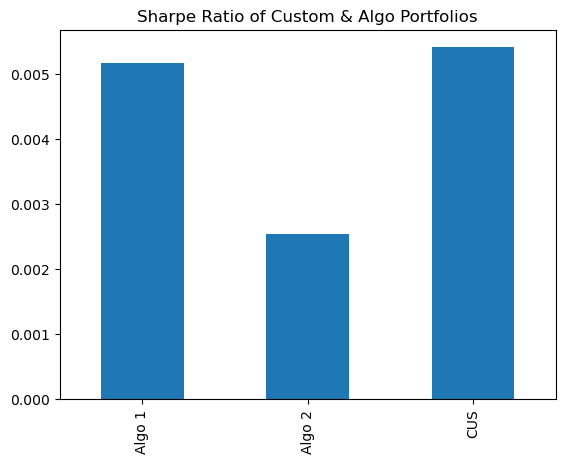

In [88]:
#Calcualte and plot the Sharpe Ratio
Sharpe_Ratio = (analyses_returns.mean())/(analyses_returns.std() * np.sqrt(252))
Sharpe_Ratio.plot(kind='bar', title='Sharpe Ratio of Custom & Algo Portfolios')

# Performance Evaluation

In [100]:
print(f'My custom portfolio has a share ratio similar to Algorithmic 1 which means it has a decent risk-adjustment performance in comparison to Algorithmic 2. Yet, my custom  portfolio does experience a beta of more than 1 which means it is more volatile than Algorithmic 1. The custom portfolio also has a higher deviation which can reflect a sense of volatility or higher risk. Algorithmic 2 is 55% positively correlated to my custom portfolio translating as the higher risk option in comparison to Algorithmic 1. If you would prefer a lower risk investment with similar to better returns, then Algorithmic 1 outperforms the custom portfolio. If you are unconcerned about volatility, then the custom portfolio is the right option in comparison to algorithmic 1 and 2 portfolios.')  

My custom portfolio has a share ratio similar to Algorithmic 1 which means it has a decent risk-adjustment performance in comparison to Algorithmic 2. Yet, my custom  portfolio does experience a beta of more than 1 which means it is more volatile than Algorithmic 1. The custom portfolio also has a higher deviation which can reflect a sense of volatility or higher risk. Algorithmic 2 is 55% positively correlated to my custom portfolio translating as the higher risk option in comparison to Algorithmic 1. If you would prefer a lower risk investment with similar to better returns, then Algorithmic 1 outperforms the custom portfolio. If you are unconcerned about volatility, then the custom portfolio is the right option in comparison to algorithmic 1 and 2 portfolios.
